# Import necessary libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

# TSPSolver Class

The `TSPSolver` class implements a genetic algorithm for solving the Traveling Salesman Problem (TSP). It includes methods for computing distance matrices, initializing populations, evaluating fitness, performing selection, crossover, mutation, and plotting the best path found during the optimization process.

## Methods:

- `__init__(self, coordinates)`: Initializes the TSPSolver object with given coordinates.
- `compute_distance_matrix(self, coordinates)`: Computes the distance matrix between all pairs of coordinates.
- `calculate_distance(self, path)`: Calculates the total distance of a given path.
- `initialize_population(self, population_size)`: Generates an initial population of random paths.
- `evaluate_fitness(self, population)`: Evaluates the fitness of each individual in the population.
- `selection(self, population, fitness)`: Performs selection based on fitness proportionate selection.
- `crossover(self, parent1, parent2, crossover_prob)`: Performs crossover between two parents to produce a child.
- `mutate(self, individual, mutation_prob)`: Mutates an individual based on a mutation probability.
- `plot_path(self, path, iteration)`: Plots the best path found during a specified iteration.
- `genetic_algorithm(self, population_size, generations, elitism_size, plot_interval, crossover_prob, mutation_prob=)`: Implements the genetic algorithm to solve the TSP.

In [20]:
class TSPSolver:
    def __init__(self, coordinates):
        self.coordinates = coordinates
        self.distance_matrix = self.compute_distance_matrix(coordinates)
        self.num_cities = len(coordinates)
        self.best_path = None
        self.best_distance = float('inf')

    def compute_distance_matrix(self, coordinates):
        num_cities = len(coordinates)
        distance_matrix = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(num_cities):
                distance_matrix[i][j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
        return distance_matrix

    def calculate_distance(self, path):
        distance = 0
        for i in range(len(path) - 1):
            distance += self.distance_matrix[path[i]][path[i+1]]
        distance += self.distance_matrix[path[-1]][path[0]]
        return distance

    def initialize_population(self, population_size):
        population = []
        for _ in range(population_size):
            individual = list(np.random.permutation(self.num_cities))
            population.append(individual)
        return population

    def evaluate_fitness(self, population):
        fitness = []
        for individual in population:
            fitness.append(1 / self.calculate_distance(individual))
        return fitness

    def selection(self, population, fitness):
        total_fitness = sum(fitness)
        probabilities = [f / total_fitness for f in fitness]
        selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
        return [population[i] for i in selected_indices]

    def crossover(self, parent1, parent2, crossover_prob):
        if random.random() < crossover_prob:  # Crossover probability
            size = len(parent1)
            start, end = sorted(random.sample(range(size), 2))
            child = [None] * size
            child[start:end+1] = parent1[start:end+1]

            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            return child
        else:
            return parent1  # No crossover, return the parent unchanged

    def mutate(self, individual, mutation_prob):
        for i in range(len(individual)):
            if random.random() < mutation_prob:  # Mutation probability
                j = random.randint(0, len(individual) - 1)
                individual[i], individual[j] = individual[j], individual[i]
        return individual

    def plot_path(self, path, iteration):
        plt.figure(figsize=(10, 6))
        coordinates = [self.coordinates[city] for city in path]
        coordinates.append(coordinates[0])  # Return to the starting point
        x, y = zip(*coordinates)
        plt.plot(x, y, 'o-')
        plt.title(f'Iteration {iteration} - Best Path Distance: {self.best_distance:.2f}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

    def genetic_algorithm(self, population_size=50, generations=100, elitism_size=2, plot_interval=10, crossover_prob=0.6, mutation_prob=0.1):
        population = self.initialize_population(population_size)

        for generation in range(generations):
            fitness = self.evaluate_fitness(population)
            best_individual = population[np.argmax(fitness)]
            best_distance = self.calculate_distance(best_individual)

            if best_distance < self.best_distance:
                self.best_distance = best_distance
                self.best_path = best_individual

            if generation % plot_interval == 0:
                self.plot_path(self.best_path, generation)

            # Elitism: Carry over the best individuals to the next generation
            sorted_population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0], reverse=True)]
            new_population = sorted_population[:elitism_size]

            # Selection and generation of new offspring
            selected_population = self.selection(population, fitness)
            while len(new_population) < population_size:
                parent1, parent2 = random.sample(selected_population, 2)
                child = self.crossover(parent1, parent2, crossover_prob)
                child = self.mutate(child, mutation_prob)
                new_population.append(child)

            population = new_population

        self.plot_path(self.best_path, generations)  # Plot the final best path
        return self.best_path, self.best_distance

def read_coordinates(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            x = float(row['x'])
            y = float(row['y'])
            coordinates.append((x, y))
    return coordinates


1. **File Path**: Define the file path where the CSV file containing the coordinates is located. For example, `file_path = '/content/Data set CSV.csv'`.

2. **Read Coordinates**: Use the `read_coordinates` function to read the coordinates from the CSV file specified by the file path. For example, `coordinates = read_coordinates(file_path)`.

3. **Initialize Solver**: Create an instance of the `TSPSolver` class with the coordinates obtained from the CSV file. For example, `solver = TSPSolver(coordinates)`.

In [3]:
file_path = '/content/Data set CSV.csv'
coordinates = read_coordinates(file_path)
solver = TSPSolver(coordinates)

**TRY NUM 1**

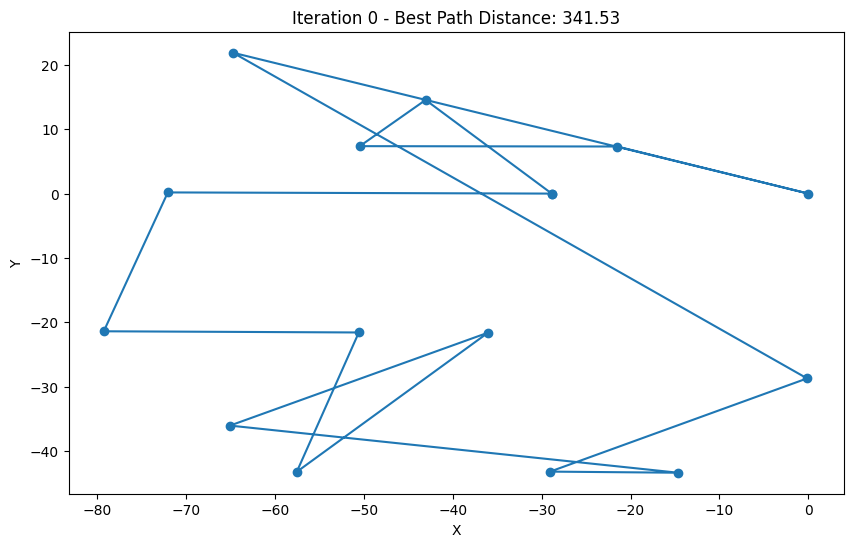

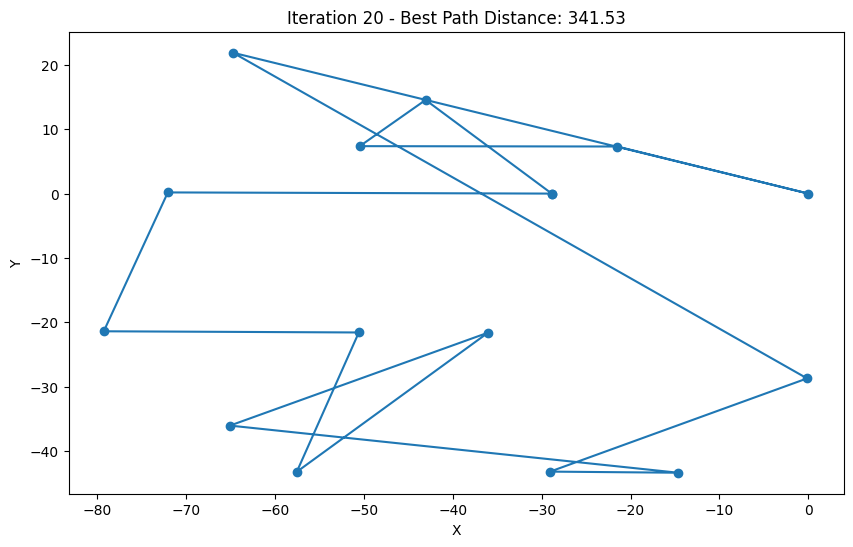

In [25]:
best_path, best_distance = solver.genetic_algorithm(population_size=13, generations=20, elitism_size=2, plot_interval=20, crossover_prob=0.8, mutation_prob=0.05)



In [26]:
print("Best path:", best_path)
print("Best distance:", best_distance)

Best path: [1, 6, 2, 9, 13, 7, 11, 3, 5, 10, 4, 0, 12, 8, 14]
Best distance: 341.52764466096585


**TRY NUM 2**

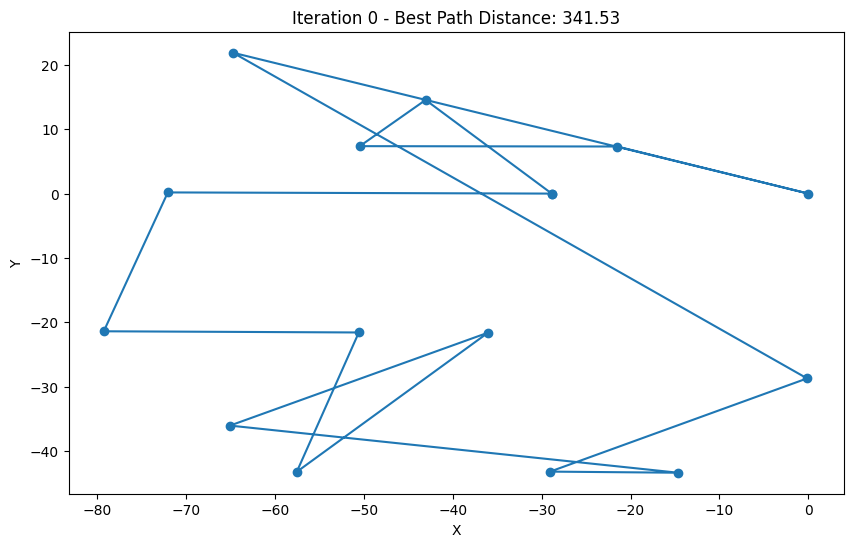

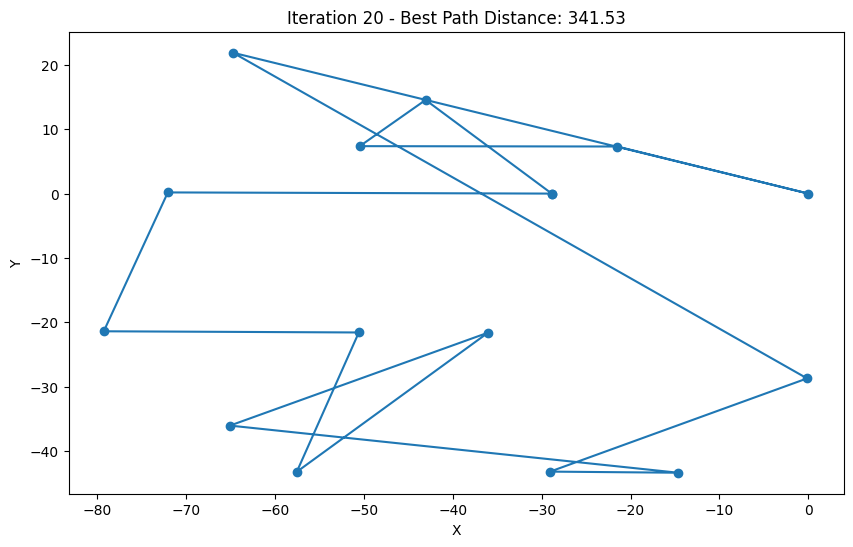

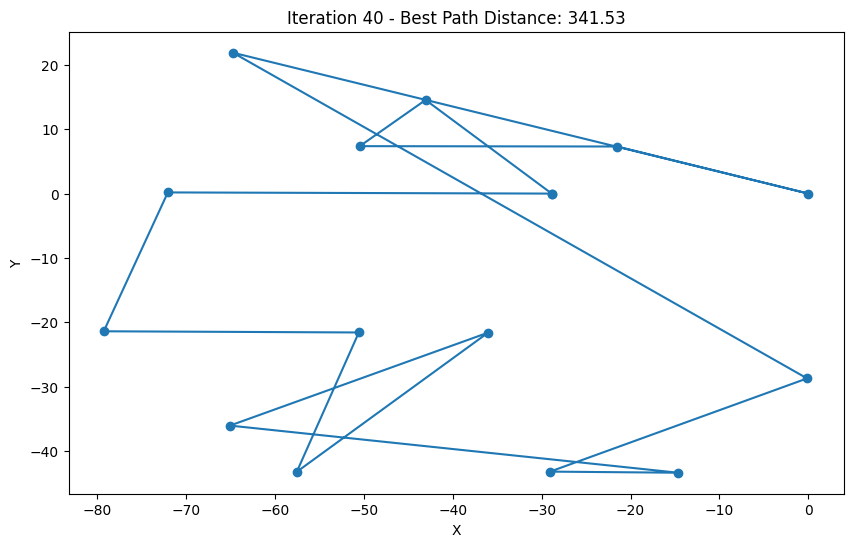

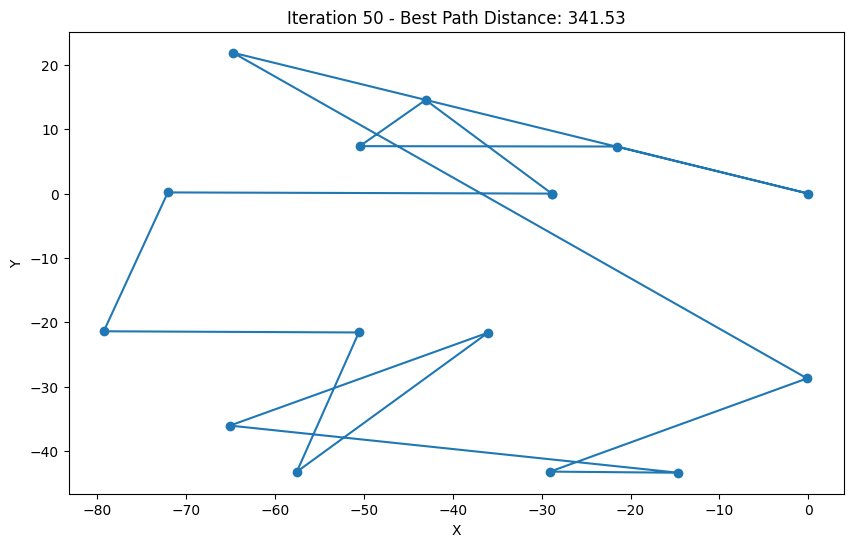

In [18]:
best_path, best_distance = solver.genetic_algorithm(population_size=50, generations=50, elitism_size=4, plot_interval=20, crossover_prob=0.5, mutation_prob=0.3)


In [27]:
print("Best path:", best_path)
print("Best distance:", best_distance)

Best path: [1, 6, 2, 9, 13, 7, 11, 3, 5, 10, 4, 0, 12, 8, 14]
Best distance: 341.52764466096585
